In [25]:
from Bio.KEGG.KGML.KGML_parser import read
import os
import pandas as pd

df_xmlreaction = pd.DataFrame(columns=["org_name","pathway_id", "pathway_title","reaction_id", "reaction_name"])

org_list = ['mbry','mko','mca']
for org in org_list:
    path=".\\"+org
    xmls = [path+'\\'+i for i in os.listdir(path) if i.endswith('.xml')]
    for xml in xmls:
        pathway = read(open(xml, 'r'))
        pathway_id = pathway.name.replace("path:"+org,"map")
        pathway_title = pathway.title
        for reaction in pathway.reaction_entries:
            rxnids = reaction.reaction.replace("rn:","")
            if len(rxnids) >6:
                rxnids = rxnids.split(" ")
                for rxnid in rxnids:
                    df_xmlreaction.loc[len(df_xmlreaction.index)]=[org, pathway_id, pathway_title, rxnid.strip(), reaction.name]
            else:
                df_xmlreaction.loc[len(df_xmlreaction.index)]=[org, pathway_id, pathway_title, rxnids.strip(), reaction.name]
        print(xml+"      done")

.\mbry\mbry00010.xml      done
.\mbry\mbry00020.xml      done
.\mbry\mbry00030.xml      done
.\mbry\mbry00040.xml      done
.\mbry\mbry00051.xml      done
.\mbry\mbry00052.xml      done
.\mbry\mbry00053.xml      done
.\mbry\mbry00061.xml      done
.\mbry\mbry00071.xml      done
.\mbry\mbry00130.xml      done
.\mbry\mbry00190.xml      done
.\mbry\mbry00220.xml      done
.\mbry\mbry00230.xml      done
.\mbry\mbry00240.xml      done
.\mbry\mbry00250.xml      done
.\mbry\mbry00260.xml      done
.\mbry\mbry00261.xml      done
.\mbry\mbry00270.xml      done
.\mbry\mbry00280.xml      done
.\mbry\mbry00281.xml      done
.\mbry\mbry00290.xml      done
.\mbry\mbry00300.xml      done
.\mbry\mbry00310.xml      done
.\mbry\mbry00330.xml      done
.\mbry\mbry00332.xml      done
.\mbry\mbry00340.xml      done
.\mbry\mbry00350.xml      done
.\mbry\mbry00360.xml      done
.\mbry\mbry00361.xml      done
.\mbry\mbry00362.xml      done
.\mbry\mbry00364.xml      done
.\mbry\mbry00380.xml      done
.\mbry\m

In [34]:
pathway.entries

{9: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9fbe0>,
 19: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9faf0>,
 20: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9fa90>,
 37: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9fa30>,
 38: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9f9d0>,
 39: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9f970>,
 40: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9f910>,
 42: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9f8b0>,
 43: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9f850>,
 44: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9f7f0>,
 63: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9f790>,
 64: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9f730>,
 65: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9f6d0>,
 66: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9f670>,
 67: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9f610>,
 71: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9f5b0>,
 72: <Bio.KEGG.KGML.KGML_pathway.Entry at 0x2923de9f550>,
 73: <Bio.KEGG.

In [32]:
for entry in pathway.entries:
    print(entry.id)

AttributeError: 'int' object has no attribute 'id'

In [4]:
import numpy as np

def unique(dataframe, column): 
    list = dataframe[column].tolist()
    return(np.unique(list))

In [26]:
maplist = unique(df_xmlreaction, "pathway_id")
for map in maplist:
    pathway_title = df_xmlreaction[df_xmlreaction["pathway_id"]==map]["pathway_title"].tolist()[0]
    rxnlist = unique(df_xmlreaction[df_xmlreaction["pathway_id"]==map], "reaction_id")
    print("https://www.kegg.jp/pathway/"+map+"     "+pathway_title)
    for rxn in rxnlist:
        string = rxn
        results = df_xmlreaction[(df_xmlreaction["pathway_id"]==map) & (df_xmlreaction["reaction_id"]==rxn)]
        if "mbry" in results["org_name"].tolist():
            string = string + " yellow"
        else:
            string = string + " white"
        if "mko" in results["org_name"].tolist():
            string = string + " pink"
        else:
            string = string + " white"
        if "mca" in results["org_name"].tolist():
            string = string + " #99cc66"
        else:
            string = string + " white"
        print(string)

https://www.kegg.jp/pathway/map00010     Glycolysis / Gluconeogenesis
R00014 yellow pink #99cc66
R00199 yellow pink white
R00200 yellow pink #99cc66
R00206 yellow pink #99cc66
R00235 yellow pink #99cc66
R00341 yellow white white
R00658 yellow pink #99cc66
R00710 yellow white white
R00711 yellow white white
R00746 yellow pink #99cc66
R00754 yellow pink #99cc66
R00959 yellow pink #99cc66
R01015 yellow pink #99cc66
R01061 yellow pink #99cc66
R01070 yellow pink #99cc66
R01196 white pink #99cc66
R01512 yellow pink #99cc66
R01518 yellow pink #99cc66
R01600 yellow pink #99cc66
R01786 yellow pink #99cc66
R02073 yellow pink #99cc66
R02187 white pink white
R02189 white pink white
R02569 yellow pink #99cc66
R02739 yellow pink #99cc66
R02740 yellow pink #99cc66
R03270 yellow pink #99cc66
R03321 yellow pink #99cc66
R04779 yellow white #99cc66
R04780 white pink white
R07618 yellow pink #99cc66
R09127 yellow pink #99cc66
https://www.kegg.jp/pathway/map00020     Citrate cycle (TCA cycle)
R00014 yellow

In [28]:
compare_df = pd.DataFrame(columns=["pathway_id", "pathway_title","R_number", "diff_number", "same_number"])
maplist = unique(df_xmlreaction, "pathway_id")
for map in maplist:
    pathway_title = df_xmlreaction[df_xmlreaction["pathway_id"]==map]["pathway_title"].tolist()[0]
    rxnlist = unique(df_xmlreaction[df_xmlreaction["pathway_id"]==map], "reaction_id")
    print("https://www.kegg.jp/pathway/"+map+"     "+pathway_title)
    m=0
    n=0
    for rxn in rxnlist:
        string = rxn
        results = df_xmlreaction[(df_xmlreaction["pathway_id"]==map) & (df_xmlreaction["reaction_id"]==rxn)]
        mbry = "mbry" in results["org_name"].tolist()
        mko = "mko" in results["org_name"].tolist()
        mca = "mca" in results["org_name"].tolist()
        if mbry^mko:
            m=m+1
        else:
            n=n+1
    compare_df.loc[len(compare_df.index)]=[map, pathway_title, len(rxnlist), m, n]
    print('different:%d    same:%d'%(m,n))

https://www.kegg.jp/pathway/map00010     Glycolysis / Gluconeogenesis
different:8    same:24
https://www.kegg.jp/pathway/map00020     Citrate cycle (TCA cycle)
different:4    same:16
https://www.kegg.jp/pathway/map00030     Pentose phosphate pathway
different:7    same:18
https://www.kegg.jp/pathway/map00040     Pentose and glucuronate interconversions
different:1    same:3
https://www.kegg.jp/pathway/map00051     Fructose and mannose metabolism
different:6    same:10
https://www.kegg.jp/pathway/map00052     Galactose metabolism
different:7    same:5
https://www.kegg.jp/pathway/map00053     Ascorbate and aldarate metabolism
different:2    same:2
https://www.kegg.jp/pathway/map00061     Fatty acid biosynthesis
different:9    same:41
https://www.kegg.jp/pathway/map00071     Fatty acid degradation
different:18    same:6
https://www.kegg.jp/pathway/map00100     Steroid biosynthesis
different:0    same:13
https://www.kegg.jp/pathway/map00130     Ubiquinone and other terpenoid-quinone biosyn

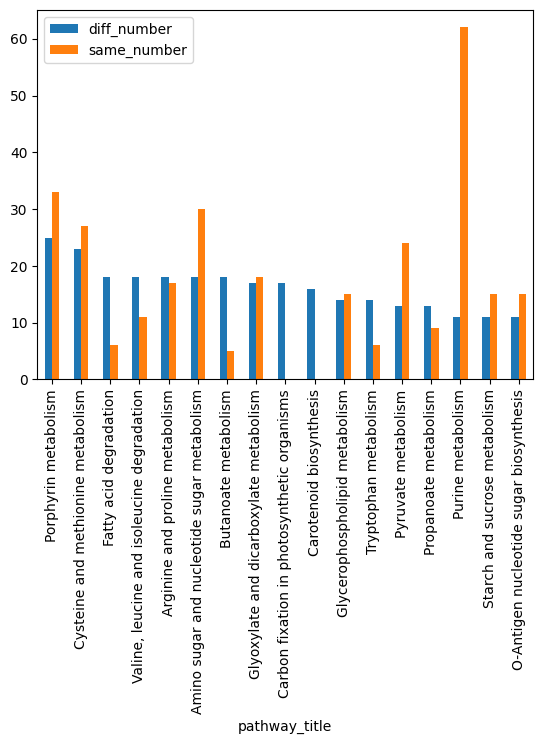

In [45]:
high_diff = compare_df[compare_df["diff_number"]>10]
high_diff = high_diff.sort_values(by="diff_number", ascending=False)
ax = high_diff.plot(x="pathway_title", y=["diff_number", "same_number"], kind="bar", rot=90)

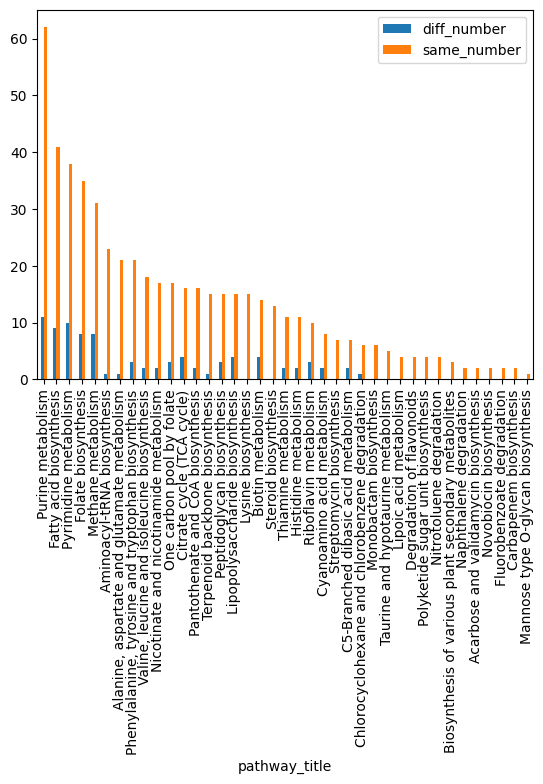

In [41]:
high_same = compare_df[compare_df["same_number"]/compare_df["diff_number"]>3]
high_same = high_same.sort_values(by="same_number", ascending=False)
ax = high_same.plot(x="pathway_title", y=["diff_number", "same_number"], kind="bar", rot=90)